In [1]:
import torch
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch import nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
torch.cuda.is_available()

True

In [3]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test,y_pred,labels=None,lenth=20,ratio=False,cmap="Blues",annot=True,width=12,fmt="g"):
    if labels == None:
        labels = pd.Series(labels for labels in y_test.squeeze()).unique()
    conf_mat = pd.DataFrame(confusion_matrix(y_test.squeeze(), y_pred.squeeze(), labels=labels))
    if ratio == True:
        conf_mat = conf_mat.divide(conf_mat.sum(axis=1), axis=0)
    fig, ax = plt.subplots(figsize=(lenth, width))
    sns.heatmap(conf_mat,cmap=cmap,annot=annot,xticklabels=labels,yticklabels=labels,fmt=fmt)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

In [4]:
f = open('word2idx.pkl','rb')
word2idx = pickle.load(f)
f.close()
f = open('idx2word_1.pkl','rb')
idx2word= pickle.load(f)
f.close()
f = open('word_df_1.pkl','rb')
word_df= pickle.load(f)
f.close()
f = open('word_embedding.pkl','rb')
word_embedding= pickle.load(f)
f.close()

In [5]:
idx2word

{0: '<EOS>',
 1: '<UNK>',
 2: '<Paddling>',
 3: '中国',
 4: '年',
 5: '月',
 6: '2019',
 7: '新',
 8: '|',
 9: '万',
 10: '日',
 11: '中',
 12: '美国',
 13: '…',
 14: '活动',
 15: '岁',
 16: '股份',
 17: '发展',
 18: '买',
 19: '亿',
 20: '10',
 21: '企业',
 22: '市场',
 23: '发布',
 24: '亿元',
 25: '亚洲',
 26: '教育',
 27: '世界',
 28: '孩子',
 29: '公告',
 30: '投资',
 31: '说',
 32: '文化',
 33: '国际',
 34: '15',
 35: '公司',
 36: '文明',
 37: '有限公司',
 38: '做',
 39: '汽车',
 40: '科技',
 41: '项目',
 42: '更',
 43: '男子',
 44: '全国',
 45: '全球',
 46: '太',
 47: '前',
 48: '20',
 49: '经济',
 50: '小学',
 51: '车',
 52: '专家',
 53: 'SUV',
 54: '增长',
 55: '学生',
 56: '手机',
 57: '日本',
 58: '超',
 59: '学校',
 60: '元',
 61: '现场',
 62: '创新',
 63: '丨',
 64: '5G',
 65: '｜',
 66: '司机',
 67: '网友',
 68: '智能',
 69: '大会',
 70: '工作',
 71: '涨停',
 72: '没',
 73: '大学',
 74: '想',
 75: '数据',
 76: '城市',
 77: '家',
 78: '美',
 79: '上市',
 80: '计划',
 81: '万元',
 82: '股东',
 83: '成',
 84: '北京',
 85: '高',
 86: '2018',
 87: '关注',
 88: '银行',
 89: '16',
 90: '合作',
 91: '曝光',
 92:

In [6]:
word_df['text'].apply(len).describe()

count    56821.000000
mean         9.087344
std          2.868494
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         48.000000
Name: text, dtype: float64

In [7]:
# def getWordEmbedding(data):
#     seq_embed = []
#     _ = 0
#     for word in data:
#         seq_embed.append(word_embedding[word])
#         _ += 1
#         if _ == 9:
#             break
#     if _ <= 9:
#         for i in range(9 - _):
#             seq_embed.append(np.zeros(128))
#     seq_embed = np.array(seq_embed)
#     return seq_embed

In [8]:
def getWordEmbedding(data):
    seq_embed = []
    _ = 0
    for word in data:
        seq_embed.append(word)
        _ += 1
        if _ == 9:
            break
    if _ <= 9:
        for i in range(9 - _):
            seq_embed.append(2)
    seq_embed = np.array(seq_embed)
    return seq_embed

In [9]:
word_df['text'] 

0        [8654, 5638, 24533, 35049, 19133, 1228, 3987, ...
1                       [4176, 35050, 4, 1516, 2247, 7357]
2                                [11755, 35051, 150, 3115]
3        [24534, 35052, 35053, 24535, 3209, 4357, 67, 7...
4                      [5639, 608, 97, 19134, 10539, 9499]
                               ...                        
56816    [1823, 5592, 2783, 17586, 69269, 30242, 3744, ...
56817            [214, 31, 3, 49, 1367, 981, 3, 49, 10587]
56818           [3417, 5090, 173, 23391, 7512, 4667, 1976]
56819    [3, 192, 2033, 2999, 3595, 5, 974, 2172, 1646,...
56820    [3213, 9677, 25768, 69270, 229, 890, 1923, 114...
Name: text, Length: 56821, dtype: object

In [10]:
word_df['text'] = word_df['text'].apply(getWordEmbedding)

In [11]:
train_df = word_df[['text','class']]
train_df['class'] = train_df['class'].apply(np.float32)

C:\Users\Javon\AppData\Local\Temp/ipykernel_19200/72822735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['class'] = train_df['class'].apply(np.float32)


In [12]:
X_train,X_test,y_train,y_test = train_test_split(
    train_df['text'].values,
    train_df['class'].values,
    test_size=0.2,
    stratify=train_df['class'],
    random_state=42,
)

In [13]:
class seqDataset(torch.utils.data.Dataset):
    def __init__(self,data,label,transformer = None):
        super(seqDataset,self).__init__()
        self.data = data
        self.label = label
        self.transformer = transformer
    
    def __getitem__(self,idx):
        if self.transformer:
            return transformer(self.data[idx]),self.label[idx]
        return self.data[idx],self.label[idx]
    
    def __len__(self):
        return len(self.data)

In [14]:
X_train = [np.array(i) for i in X_train]
X_test = [np.array(i) for i in X_test]

In [15]:
train_dataset = seqDataset(X_train,y_train)
test_dataset = seqDataset(X_test,y_test)

In [16]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=500)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=500)

In [18]:
for i,(x,y) in enumerate(test_loader):
    print(x.shape)
    break

torch.Size([500, 9])


In [17]:
def train(model,EPOCH=150,learning_rate=0.05):
    model = model
    opt = torch.optim.SGD(params=model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()
    EPOCH = EPOCH
    itr = 0
    model.cuda()
    for epoch in range(EPOCH):
        for i,(x,y) in enumerate(train_loader):
            batch_X = torch.LongTensor(np.int64(x)).cuda()
            batch_Y = torch.LongTensor(np.int64(y)).cuda()
            output = model(batch_X)
            opt.zero_grad()
            loss = loss_fn(output,batch_Y)
            loss.backward()
            opt.step()
            if (i+1) % 20 == 0:
                itr += 20
                acc = (batch_Y.detach().cpu().numpy() == output.detach().cpu().argmax(axis=1).numpy()).mean()
                print('epoch\t:{}\titr:{}\tloss:{}\tacc:{}\n'.format(epoch,itr,loss,acc))
                # print(output.detach().cpu())
    return model

def test(model):
    accs = []
    y_pred = []
    y_true = []
    for i,(x,y) in enumerate(test_loader):
        batch_X = torch.LongTensor(np.int64(x)).cuda()
        batch_Y = torch.LongTensor(np.int64(y)).cuda()
        output = model(batch_X)
        acc = (batch_Y.detach().cpu().numpy() == output.detach().cpu().argmax(axis=1).numpy()).mean()
        accs.append(acc)
        y_pred.extend(output.detach().cpu().argmax(axis=1).numpy())
        y_true.extend(batch_Y.detach().cpu().numpy()) 
    print(np.array(accs).mean())
    return y_pred,y_true

In [19]:
class SimpleRNN(nn.Module):
    def __init__(self,seq_len=9,embedding_size=128,h1_size=128,num_embeddings = len(idx2word)):
        super(SimpleRNN,self).__init__()
        self.embedding_size = embedding_size
        self.h1_size = h1_size
        self.seq_len = seq_len
        self.num_embeddings = num_embeddings

        self.embed = nn.Embedding(num_embeddings=self.num_embeddings,embedding_dim=self.embedding_size)

        self.layer1 = nn.Sequential(
            nn.RNN(input_size = self.embedding_size,hidden_size = self.h1_size,num_layers=4,batch_first=True),
        )

        self.output = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.h1_size,10),
            nn.Softmax(),
        )
    def forward(self,x):
        out = self.embed(x)
        out,hid = self.layer1(out)
        out = out[:,-1,:]
        out = self.output(out)
        return out

In [20]:
class SimpleLSTM(nn.Module):
    def __init__(self,seq_len=9,embedding_size=128,h1_size=128,num_embeddings = len(idx2word)):
        super(SimpleLSTM,self).__init__()
        self.embedding_size = embedding_size
        self.h1_size = h1_size
        self.seq_len = seq_len
        self.num_embeddings = num_embeddings

        self.embed = nn.Embedding(num_embeddings=self.num_embeddings,embedding_dim=self.embedding_size)

        self.layer1 = nn.Sequential(
            nn.LSTM(input_size = self.embedding_size,hidden_size = self.h1_size,num_layers=4,batch_first=True),
        )

        self.output = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.embedding_size,10),
            nn.Softmax(),
        )
    def forward(self,x):
        out = self.embed(x)
        out,(hn, cn) = self.layer1(out)
        out = out[:,-1,:]
        out = self.output(out)
        return out

In [19]:
class TransformerEncoder(nn.Module):
    def __init__(self,seq_len=9,embedding_size=128,num_embeddings = len(idx2word)):
        super(TransformerEncoder,self).__init__()
        self.num_embeddings = num_embeddings 
        self.embedding_size = embedding_size
        self.seq_len = seq_len
        self.emb = nn.Embedding(num_embeddings=self.num_embeddings,embedding_dim=self.embedding_size)
        self.layer1 = nn.Sequential(
            nn.TransformerEncoderLayer(d_model=embedding_size, nhead=8, batch_first=True),
            nn.TransformerEncoderLayer(d_model=embedding_size, nhead=8, batch_first=True),
            nn.TransformerEncoderLayer(d_model=embedding_size, nhead=8, batch_first=True),
            nn.TransformerEncoderLayer(d_model=embedding_size, nhead=8, batch_first=True),
        )

        self.output = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.seq_len*self.embedding_size,self.embedding_size),
            nn.Sigmoid(),
            nn.Linear(self.embedding_size,10),
            nn.Softmax(),
        )
    def forward(self,x):
        out = self.emb(x)
        out = self.layer1(out)
        out = self.output(out)
        return out

In [24]:
class SimpleCNN(nn.Module):
    def __init__(self,embedding_size=128,num_embeddings = len(idx2word)):
        super(SimpleCNN,self).__init__()
        self.num_embeddings = num_embeddings
        self.embedding_size = embedding_size
        self.embed = nn.Embedding(num_embeddings=self.num_embeddings,embedding_dim=self.embedding_size)
        self.conv1 = nn.Sequential(
            nn.Conv1d(in_channels = 128,out_channels = 256,kernel_size=2),
            nn.ReLU(),
            nn.BatchNorm1d(256),
        )
        #[batch_size = 500,channels=128,seq_len - k_s + 1 = 8]
        self.conv2 = nn.Sequential(
            nn.Conv1d(in_channels = 256,out_channels = 256,kernel_size=2),
            nn.ReLU(),
            nn.BatchNorm1d(256),
        )
        #[batch_size = 500,embedding_size = 128,seq_len - k_s + 1 = 7]
        self.conv3 = nn.Sequential(
            nn.Conv1d(in_channels = 256,out_channels = 256,kernel_size=3,stride = 2),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            # nn.MaxPool1d(6),
        )
        #[batch_size = 500,embedding_size = 256,(seq_len - k_s)/2+ 1 = 3]
        self.conv4 = nn.Sequential(
            nn.Conv1d(in_channels = 256,out_channels = 128,kernel_size = 3),
            nn.ReLU(),
            nn.BatchNorm1d(128),
        )
        #[batch_size = 500,embedding_size = 256,seq_len - k_s + 1 = 1]


        self.output = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128,10),
            nn.Softmax()
        )
    def forward(self,x):
        out = self.embed(x).transpose(2,1)
        out = self.conv1(out)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.output(out)
        return out

D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch	:0	itr:20	loss:2.282961130142212	acc:0.138

epoch	:0	itr:40	loss:2.281881332397461	acc:0.14

epoch	:0	itr:60	loss:2.273244619369507	acc:0.16

epoch	:0	itr:80	loss:2.2652087211608887	acc:0.188

epoch	:1	itr:100	loss:2.265174627304077	acc:0.184

epoch	:1	itr:120	loss:2.265465259552002	acc:0.178

epoch	:1	itr:140	loss:2.249157428741455	acc:0.198

epoch	:1	itr:160	loss:2.279695987701416	acc:0.146

epoch	:2	itr:180	loss:2.231929302215576	acc:0.218

epoch	:2	itr:200	loss:2.2570507526397705	acc:0.184

epoch	:2	itr:220	loss:2.2273612022399902	acc:0.212

epoch	:2	itr:240	loss:2.221262216567993	acc:0.232

epoch	:3	itr:260	loss:2.2008345127105713	acc:0.266

epoch	:3	itr:280	loss:2.2131781578063965	acc:0.254

epoch	:3	itr:300	loss:2.206691265106201	acc:0.248

epoch	:3	itr:320	loss:2.2060630321502686	acc:0.242

epoch	:4	itr:340	loss:2.1781840324401855	acc:0.278

epoch	:4	itr:360	loss:2.2067770957946777	acc:0.244

epoch	:4	itr:380	loss:2.1920113563537598	acc:0.268

epoch	:4	itr:400	loss:2.1943

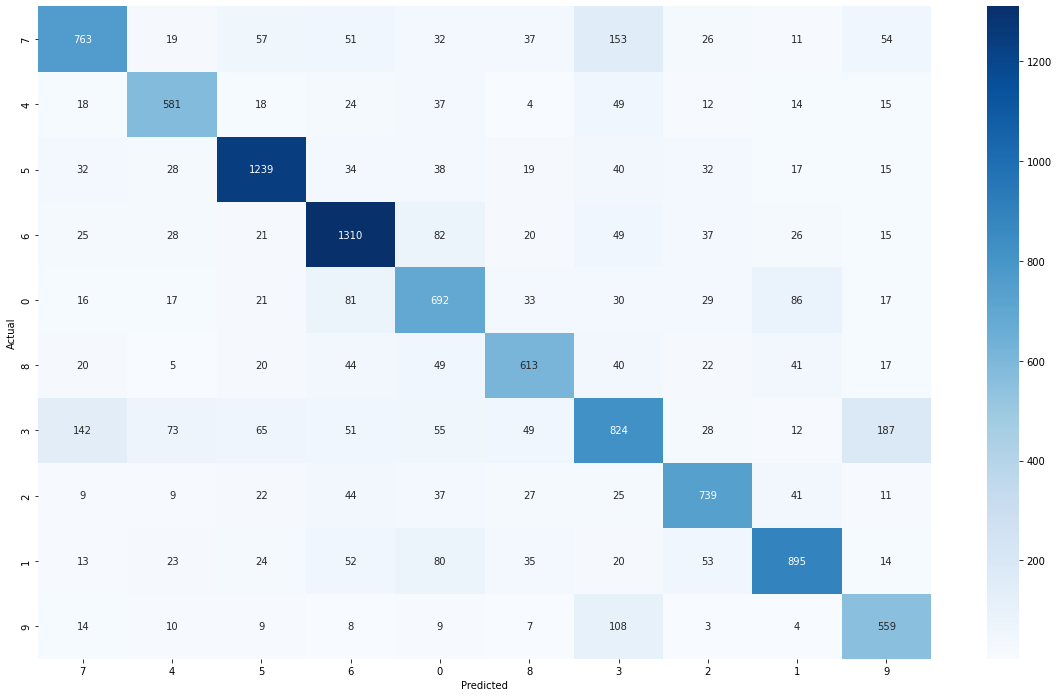

In [21]:
model = train(TransformerEncoder(),EPOCH=500,learning_rate=0.5)
y_pred,y_true = test(model)
plot_confusion_matrix(np.array(y_true),np.array(y_pred))

D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch	:0	itr:20	loss:2.2955093383789062	acc:0.154

epoch	:0	itr:40	loss:2.2888307571411133	acc:0.14

epoch	:0	itr:60	loss:2.277740716934204	acc:0.156

epoch	:0	itr:80	loss:2.2686939239501953	acc:0.166

epoch	:1	itr:100	loss:2.2732110023498535	acc:0.138

epoch	:1	itr:120	loss:2.279480457305908	acc:0.132

epoch	:1	itr:140	loss:2.2718398571014404	acc:0.152

epoch	:1	itr:160	loss:2.2576873302459717	acc:0.198

epoch	:2	itr:180	loss:2.2670154571533203	acc:0.158

epoch	:2	itr:200	loss:2.2685139179229736	acc:0.156

epoch	:2	itr:220	loss:2.252875328063965	acc:0.176

epoch	:2	itr:240	loss:2.217357873916626	acc:0.234

epoch	:3	itr:260	loss:2.2425060272216797	acc:0.2

epoch	:3	itr:280	loss:2.2446906566619873	acc:0.204

epoch	:3	itr:300	loss:2.228733539581299	acc:0.234

epoch	:3	itr:320	loss:2.1941847801208496	acc:0.252

epoch	:4	itr:340	loss:2.2058160305023193	acc:0.256

epoch	:4	itr:360	loss:2.208425521850586	acc:0.248

epoch	:4	itr:380	loss:2.2080206871032715	acc:0.246

epoch	:4	itr:400	loss:2.1

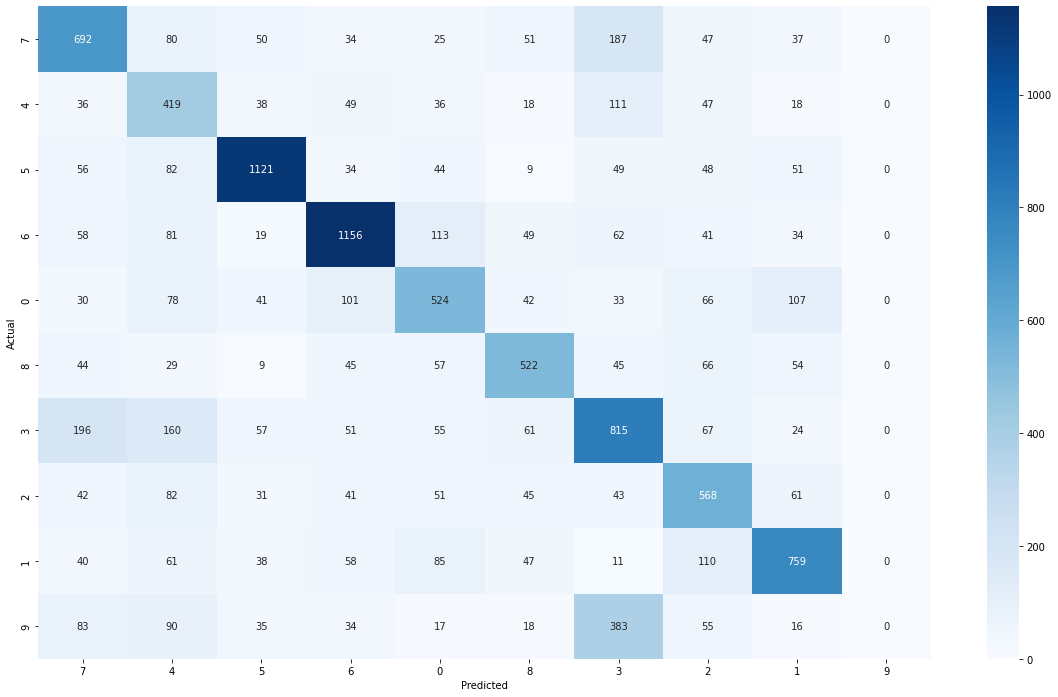

In [23]:
model = train(SimpleRNN(),EPOCH=500,learning_rate=0.5)
y_pred,y_true = test(model)
plot_confusion_matrix(np.array(y_true),np.array(y_pred))

D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch	:0	itr:20	loss:2.3010404109954834	acc:0.138

epoch	:0	itr:40	loss:2.2993102073669434	acc:0.14

epoch	:0	itr:60	loss:2.2970690727233887	acc:0.134

epoch	:0	itr:80	loss:2.292898416519165	acc:0.166

epoch	:1	itr:100	loss:2.2905619144439697	acc:0.138

epoch	:1	itr:120	loss:2.2906734943389893	acc:0.14

epoch	:1	itr:140	loss:2.2875289916992188	acc:0.134

epoch	:1	itr:160	loss:2.2802376747131348	acc:0.166

epoch	:2	itr:180	loss:2.2817718982696533	acc:0.138

epoch	:2	itr:200	loss:2.285090684890747	acc:0.14

epoch	:2	itr:220	loss:2.280639171600342	acc:0.134

epoch	:2	itr:240	loss:2.2744545936584473	acc:0.166

epoch	:3	itr:260	loss:2.277106523513794	acc:0.138

epoch	:3	itr:280	loss:2.2836782932281494	acc:0.14

epoch	:3	itr:300	loss:2.276848554611206	acc:0.134

epoch	:3	itr:320	loss:2.2724616527557373	acc:0.166

epoch	:4	itr:340	loss:2.2755136489868164	acc:0.138

epoch	:4	itr:360	loss:2.2832884788513184	acc:0.14

epoch	:4	itr:380	loss:2.275644540786743	acc:0.134

epoch	:4	itr:400	loss:2.271

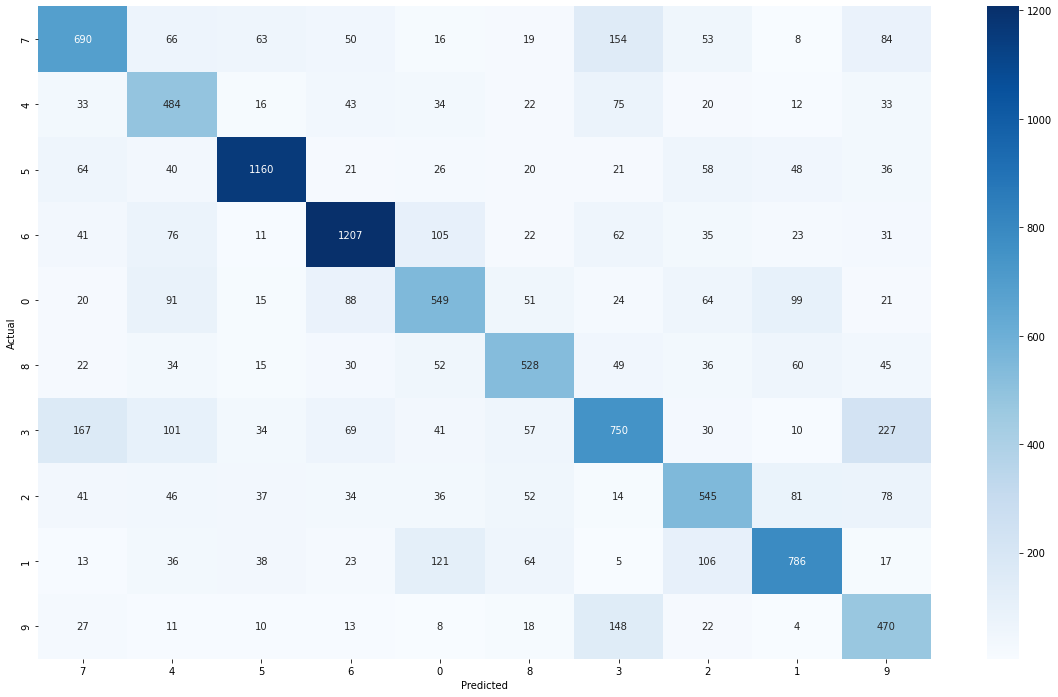

In [22]:
model = train(SimpleLSTM(),EPOCH=500,learning_rate=1)
y_pred,y_true = test(model)
plot_confusion_matrix(np.array(y_true),np.array(y_pred))

D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch	:0	itr:20	loss:2.2870070934295654	acc:0.156

epoch	:0	itr:40	loss:2.245119571685791	acc:0.222

epoch	:0	itr:60	loss:2.1901018619537354	acc:0.28

epoch	:0	itr:80	loss:2.146507501602173	acc:0.332

epoch	:1	itr:100	loss:2.1060616970062256	acc:0.362

epoch	:1	itr:120	loss:2.0067338943481445	acc:0.47

epoch	:1	itr:140	loss:1.9845120906829834	acc:0.492

epoch	:1	itr:160	loss:1.9900007247924805	acc:0.466

epoch	:2	itr:180	loss:1.9431042671203613	acc:0.524

epoch	:2	itr:200	loss:1.8711020946502686	acc:0.602

epoch	:2	itr:220	loss:1.8759771585464478	acc:0.602

epoch	:2	itr:240	loss:1.8715885877609253	acc:0.598

epoch	:3	itr:260	loss:1.8418800830841064	acc:0.624

epoch	:3	itr:280	loss:1.7866666316986084	acc:0.682

epoch	:3	itr:300	loss:1.8184705972671509	acc:0.65

epoch	:3	itr:320	loss:1.8099348545074463	acc:0.656

epoch	:4	itr:340	loss:1.7695233821868896	acc:0.704

epoch	:4	itr:360	loss:1.75946044921875	acc:0.708

epoch	:4	itr:380	loss:1.777122139930725	acc:0.694

epoch	:4	itr:400	loss:1.

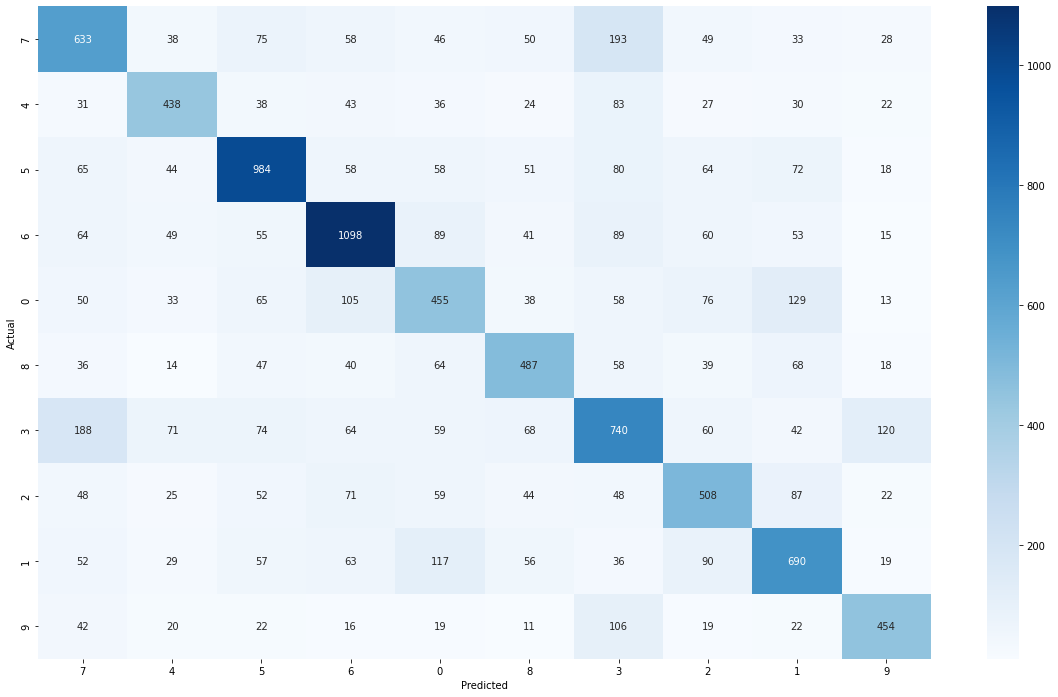

In [26]:
model = train(SimpleCNN(),EPOCH=500,learning_rate=0.5)
y_pred,y_true = test(model)
plot_confusion_matrix(np.array(y_true),np.array(y_pred))